# MORF API Working Demo

Here, we want to validate visually that MORF API works as intended. First, we show the 2D contiguous convolutional splitter.

In [1]:
%load_ext nb_black
%load_ext lab_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
from proglearn.tree.morf_split import Conv2DSplitter

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

# Splitters: Convolutional 2D Patches (Contiguous and Discontiguous)

## Contiguous 2D Convolutional Patch

In [3]:
random_state = 123456

n = 50
height = 5
d = 4
X = np.ones((n, height * d))
y = np.ones((n,))
y[:25] = 0

<IPython.core.display.Javascript object>

In [7]:
splitter = Conv2DSplitter(
    X,
    y,
    max_features=1,
    feature_combinations=1.5,
    random_state=random_state,
    image_height=height,
    image_width=d,
    patch_height_max=5,
    patch_height_min=1,
    patch_width_min=1,
    patch_width_max=2,
)

<IPython.core.display.Javascript object>

In [8]:
%%timeit
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

779 µs ± 41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<IPython.core.display.Javascript object>

In [9]:
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

In [10]:
print(proj_X.shape, proj_mat.shape, X.shape)

(50, 20) (20, 20) (50, 20)


<IPython.core.display.Javascript object>

[Text(0.5, 1.0, 'Sampled Projection Matrix - 2D Convolutional MORF'),
 Text(0.5, 28.5, 'Sampled Patches'),
 Text(28.5, 0.5, 'Vectorized Projections')]

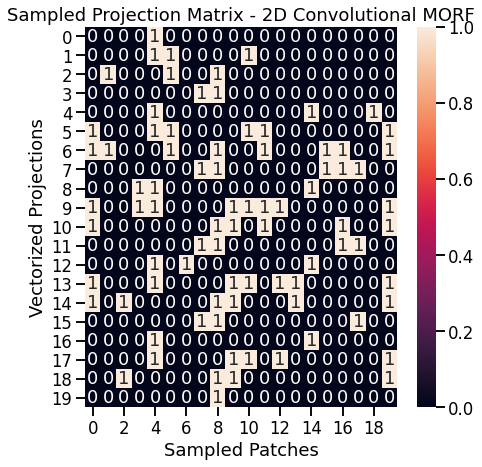

<IPython.core.display.Javascript object>

In [11]:
sns.set_context(
    "talk",
    #                 font_scale=1.5
)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(proj_mat, annot=True, ax=ax)
ax.set(
    title="Sampled Projection Matrix - 2D Convolutional MORF",
    xlabel="Sampled Patches",
    ylabel="Vectorized Projections",
)

<ipython-input-44-92ced63bb350>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


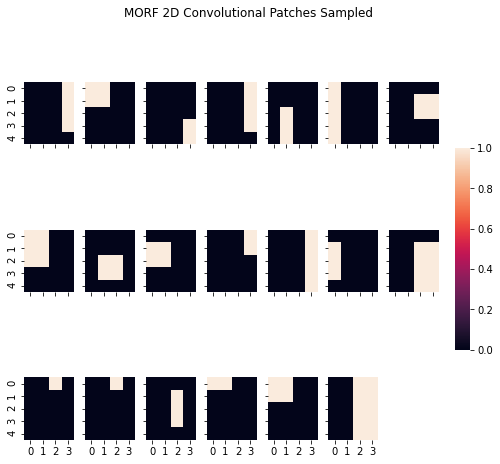

<IPython.core.display.Javascript object>

In [44]:
empty_mat = np.zeros((height, d))

fig, axs = plt.subplots(3, np.ceil(proj_mat.shape[1] / 3).astype(int), 
                        sharex=True, sharey=True,
                        figsize=(7, 7))
axs = axs.flat
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for idx in range(proj_mat.shape[1]):
    proj_vec = proj_mat[:, idx]
    
    vec_idx = np.argwhere(proj_vec == 1)
    patch_idx = np.unravel_index(vec_idx, shape=(height, d))
    mat = empty_mat.copy()
    mat[patch_idx] = 1.0
    
    sns.heatmap(mat, ax=axs[idx], 
                xticklabels=np.arange(d),
                yticklabels=np.arange(height),
                cbar=idx == 0,
                square=True,
                vmin=0, vmax=1,
                cbar_ax=None if idx else cbar_ax)

# remove unused axes
idx += 1
while idx < len(axs):
    fig.delaxes(axs[idx])
    idx += 1
    
fig.suptitle('MORF 2D Convolutional Patches Sampled')
fig.tight_layout(rect=[0, 0, .9, 1])

## Discontiguous Sample

In [60]:
random_state = 123456

n = 50
height = 5
d = 4
X = np.ones((n, height * d))
y = np.ones((n,))
y[:25] = 0

<IPython.core.display.Javascript object>

In [71]:
splitter = Conv2DSplitter(
    X,
    y,
    max_features=1,
    feature_combinations=1.5,
    random_state=random_state,
    image_height=height,
    image_width=d,
    patch_height_max=5,
    patch_height_min=1,
    patch_width_min=1,
    patch_width_max=2,
    discontiguous_height=True,
    discontiguous_width=False,
)

<IPython.core.display.Javascript object>

In [72]:
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

In [73]:
print(proj_X.shape, proj_mat.shape, X.shape)

(50, 20) (20, 20) (50, 20)


<IPython.core.display.Javascript object>

[Text(0.5, 1.0, 'Sampled Projection Matrix - 2D Convolutional MORF'),
 Text(0.5, 28.5, 'Sampled Patches'),
 Text(28.5, 0.5, 'Vectorized Projections')]

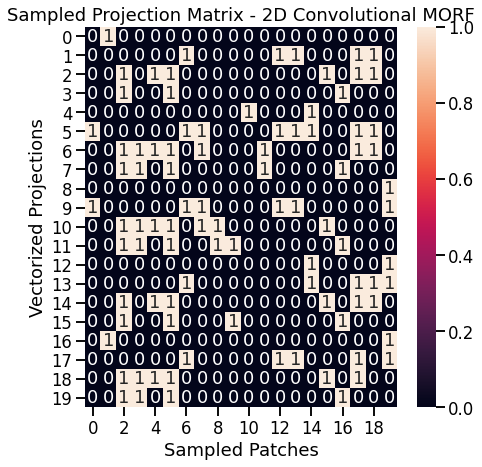

<IPython.core.display.Javascript object>

In [74]:
sns.set_context(
    "talk",
    #                 font_scale=1.5
)
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(proj_mat, annot=True, ax=ax)
ax.set(
    title="Sampled Projection Matrix - 2D Convolutional MORF",
    xlabel="Sampled Patches",
    ylabel="Vectorized Projections",
)

<ipython-input-75-a343e31dc33b>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


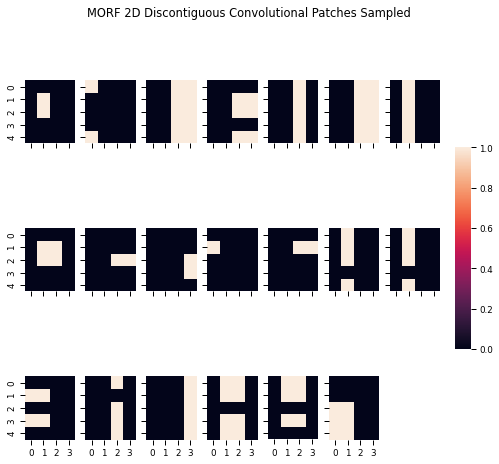

<IPython.core.display.Javascript object>

In [75]:
empty_mat = np.zeros((height, d))

sns.set_context("paper")
fig, axs = plt.subplots(
    3,
    np.ceil(proj_mat.shape[1] / 3).astype(int),
    sharex=True,
    sharey=True,
    figsize=(7, 7),
)
axs = axs.flat
cbar_ax = fig.add_axes([0.91, 0.3, 0.03, 0.4])

for idx in range(proj_mat.shape[1]):
    proj_vec = proj_mat[:, idx]

    vec_idx = np.argwhere(proj_vec == 1)
    patch_idx = np.unravel_index(vec_idx, shape=(height, d))
    mat = empty_mat.copy()
    mat[patch_idx] = 1.0

    sns.heatmap(
        mat,
        ax=axs[idx],
        xticklabels=np.arange(d),
        yticklabels=np.arange(height),
        cbar=idx == 0,
        square=True,
        vmin=0,
        vmax=1,
        cbar_ax=None if idx else cbar_ax,
    )

# remove unused axes
idx += 1
while idx < len(axs):
    fig.delaxes(axs[idx])
    idx += 1

fig.suptitle("MORF 2D Discontiguous Convolutional Patches Sampled")
fig.tight_layout(rect=[0, 0, 0.9, 1])

## Profiling the Projection Matrix Sampling

Let's increase the sample size and the height and the width of samples.

Note that if ``height`` or ``d`` is increased too much... then it's pretty slow currently.

In [44]:
n = 1000
height = 100
d = 80
X = np.ones((n, height * d))
y = np.ones((n,))
y[:25] = 0

<IPython.core.display.Javascript object>

In [45]:
splitter = Conv2DSplitter(X, y, max_features=1, feature_combinations=1.5,
        random_state=random_state, image_height=height, image_width=d, 
        patch_height_max=5, patch_height_min=1, patch_width_min=1, patch_width_max=2)

<IPython.core.display.Javascript object>

In [47]:
%%timeit
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

1.53 s ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>

In [34]:
%%timeit
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

165 ms ± 7.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<IPython.core.display.Javascript object>

In [48]:
%%prun
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

         280026 function calls in 1.675 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.268    1.268    1.609    1.609 morf.py:194(sample_proj_mat)
     8000    0.092    0.000    0.340    0.000 morf.py:131(_get_rand_patch_idx)
        1    0.067    0.067    1.675    1.675 <string>:1(<module>)
    24002    0.058    0.000    0.144    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     8002    0.044    0.000    0.044    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     8000    0.035    0.000    0.086    0.000 index_tricks.py:35(ix_)
    16001    0.026    0.000    0.026    0.000 {built-in method numpy.arange}
    32000    0.014    0.000    0.021    0.000 numerictypes.py:285(issubclass_)
    16000    0.014    0.000    0.037    0.000 numerictypes.py:359(issubdtype)
    16000    0.009    0.000    0.009    0.000 {method 'reshape' of 'numpy.ndarray' objects}
    

In [42]:
%%prun
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

         288026 function calls in 1.677 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.294    1.294    1.669    1.669 morf.py:192(sample_proj_mat)
     8000    0.082    0.000    0.131    0.000 morf.py:131(_get_rand_patch_idx)
    24002    0.065    0.000    0.159    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     8002    0.050    0.000    0.050    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     8000    0.039    0.000    0.094    0.000 index_tricks.py:35(ix_)
    16001    0.029    0.000    0.029    0.000 {built-in method numpy.arange}
     8000    0.019    0.000    0.197    0.000 morf.py:160(_get_patch_idx)
    16000    0.015    0.000    0.039    0.000 numerictypes.py:359(issubdtype)
    32000    0.015    0.000    0.022    0.000 numerictypes.py:285(issubclass_)
    16000    0.010    0.000    0.010    0.000 {method 'reshape' of 'numpy.ndarray' object

In [35]:
%%prun
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

         72026 function calls in 0.171 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.084    0.084    0.167    0.167 morf.py:192(sample_proj_mat)
     2000    0.017    0.000    0.027    0.000 morf.py:131(_get_rand_patch_idx)
     6002    0.014    0.000    0.035    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     2002    0.010    0.000    0.010    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     2000    0.008    0.000    0.021    0.000 index_tricks.py:35(ix_)
     4001    0.006    0.000    0.006    0.000 {built-in method numpy.arange}
     2000    0.004    0.000    0.043    0.000 morf.py:160(_get_patch_idx)
        1    0.004    0.004    0.171    0.171 <string>:1(<module>)
     8000    0.003    0.000    0.005    0.000 numerictypes.py:285(issubclass_)
     4000    0.003    0.000    0.009    0.000 numerictypes.py:359(issubdtype)
        1    0.003    0

In [23]:
%%prun
proj_X, proj_mat = splitter.sample_proj_mat(sample_inds=np.arange(n))

<IPython.core.display.Javascript object>

         76006 function calls in 0.170 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.083    0.083    0.170    0.170 morf.py:201(sample_proj_mat)
     6000    0.021    0.000    0.021    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
     6000    0.015    0.000    0.036    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     2000    0.009    0.000    0.030    0.000 morf.py:131(_get_rand_patch_idx)
     2000    0.008    0.000    0.021    0.000 index_tricks.py:35(ix_)
     4001    0.006    0.000    0.006    0.000 {built-in method numpy.arange}
     2000    0.005    0.000    0.044    0.000 morf.py:169(_get_patch_idx)
     4000    0.004    0.000    0.009    0.000 numerictypes.py:359(issubdtype)
     8000    0.003    0.000    0.005    0.000 numerictypes.py:285(issubclass_)
        1    0.003    0.003    0.003    0.003 {built-in method numpy.zeros}
     4000    0

# Classification Tree - Convolutional Tree

In [4]:
from proglearn.tree.morf_tree import Conv2DObliqueTreeClassifier

<IPython.core.display.Javascript object>

In [5]:
clf = Conv2DObliqueTreeClassifier(
    random_state=random_state,
    image_height=height,
    image_width=d,
    patch_height_max=5,
    patch_height_min=1,
    patch_width_min=1,
    patch_width_max=2,
    discontiguous_height=True,
    discontiguous_width=False,
)

<IPython.core.display.Javascript object>

In [6]:
clf.fit(X, y)

Conv2DObliqueTreeClassifier(discontiguous_height=True, image_height=5,
                            image_width=4, patch_height_max=5,
                            patch_width_max=2, random_state=123456)

<IPython.core.display.Javascript object>

# Classification Forest - Convolutional Forest

In [7]:
from proglearn.tree.morf import Conv2DObliqueForestClassifier

<IPython.core.display.Javascript object>

In [15]:
clf = Conv2DObliqueForestClassifier(
    n_estimators=100,
    random_state=random_state,
    image_height=height,
    image_width=d,
    patch_height_max=5,
    patch_height_min=1,
    patch_width_min=1,
    patch_width_max=2,
    discontiguous_height=True,
    discontiguous_width=False,
    n_jobs=-1,
)

<IPython.core.display.Javascript object>

In [16]:
clf.fit(X, y)

Conv2DObliqueForestClassifier(discontiguous_height=True, image_height=5,
                              image_width=4, n_jobs=-1, patch_height_max=5,
                              patch_width_max=2, random_state=123456)

<IPython.core.display.Javascript object>

In [17]:
%%timeit
clf.fit(X, y)

6.38 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>

In [18]:
%%prun
clf.fit(X, y)

<IPython.core.display.Javascript object>

         199570 function calls (195767 primitive calls) in 6.434 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      388    6.300    0.016    6.300    0.016 {method 'acquire' of '_thread.lock' objects}
      500    0.017    0.000    0.066    0.000 inspect.py:2112(_signature_from_function)
    10000    0.017    0.000    0.035    0.000 inspect.py:2477(__init__)
    10000    0.014    0.000    0.015    0.000 enum.py:289(__call__)
 2000/100    0.009    0.000    0.051    0.001 base.py:28(clone)
      500    0.006    0.000    0.008    0.000 base.py:165(<listcomp>)
      500    0.006    0.000    0.101    0.000 base.py:178(get_params)
      500    0.005    0.000    0.009    0.000 inspect.py:2760(__init__)
      500    0.005    0.000    0.093    0.000 base.py:151(_get_param_names)
    29500    0.004    0.000    0.004    0.000 inspect.py:2527(name)
      500    0.004    0.000    0.005    0.000 base.py:176(<listcomp>)
    10500    0.